# 影像平滑 Opencv
平均平滑 cv2.filter2D與 cv2.blur  
高斯平滑 cv2.GaussianBlur  
中值濾波 cv2.medianBlur  
雙邊濾波 cv2.bilateralFilter  
https://bbsonlin.github.io/post/2018-12-16-opencv-tutorial-4/

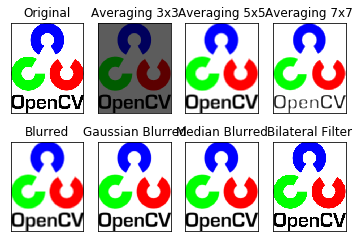

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def draw_on_plot(pos, src, title):
    plt.subplot(pos), plt.imshow(src), plt.title(title)
    plt.xticks([]), plt.yticks([])

# 路徑不能有中文
img = cv2.imread('C:\\Users\\TMU_AIMC\\Desktop\\james\\open.png')

draw_on_plot(241, img, 'Original')
# 濾波器(遮罩) 通常是奇數的方形矩陣(3x3, 5x5...) 遮罩尺度越大，平滑(模糊)效果越明顯
kernel = np.ones((3, 3), np.float32)/25  # 32位 單精確 浮點數 ，但是為何要/25 ???
dst = cv2.filter2D(img, -1, kernel) # filter內的參數怎麼設???
draw_on_plot(242, dst, 'Averaging 3x3')

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
draw_on_plot(243, dst, 'Averaging 5x5')

kernel = np.ones((7, 7), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
draw_on_plot(244, dst, 'Averaging 7x7')
# 以下function的參數???
blur = cv2.blur(img, (5, 5))
draw_on_plot(245, blur, 'Blurred')

gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
draw_on_plot(246, gaussian_blur, 'Gaussian Blurred')

median_blur = cv2.medianBlur(img, 5)
draw_on_plot(247, gaussian_blur, 'Median Blurred')

bilateral_filter = cv2.bilateralFilter(img, 9, 75, 75)
draw_on_plot(248, bilateral_filter, 'Bilateral Filter')

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x27325323c18>,
 <matplotlib.image.AxesImage at 0x27324d4e2b0>)

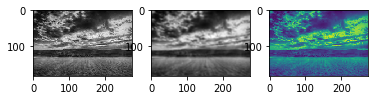

In [27]:
# https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/560491/

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 統一的2D濾波器 cv2.filter2D

img=cv2.imread('view.jpg',0) #直接讀為灰度影象
img1=np.float32(img) # 轉為數值類別
kernel=np.ones((5,5),np.float32)/25
dst=cv2.filter2D(img1, -1, kernel)
plt.subplot(1,3,1), plt.imshow(img1,'gray') # 預設彩色，另一種彩色bgr
plt.subplot(1,3,2), plt.imshow(dst,'gray')
plt.subplot(1,3,3), plt.imshow(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x27325319160>,
 <matplotlib.image.AxesImage at 0x27324a87cf8>)

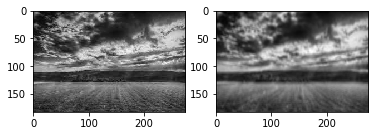

In [26]:
#均值濾波

img = cv2.imread('view.jpg',0) #直接讀為灰度影象
blur = cv2.blur(img,(3,5)) #模板大小3*5
plt.subplot(1,2,1),plt.imshow(img,'gray') #預設彩色，另一種彩色bgr
plt.subplot(1,2,2),plt.imshow(blur,'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x27325146be0>,
 <matplotlib.image.AxesImage at 0x273250859b0>)

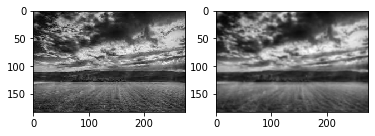

In [31]:
# 高斯濾波

img = cv2.imread('view.jpg',0) #直接讀為灰度影象
# for i in range(2000): #新增點噪聲
    
temp_x = np.random.randint(0,img.shape[0])
temp_y = np.random.randint(0,img.shape[1])
img[temp_x][temp_y] = 255
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(1,2,1),plt.imshow(img,'gray')#預設彩色，另一種彩色bgr
plt.subplot(1,2,2),plt.imshow(blur,'gray') 

(<matplotlib.axes._subplots.AxesSubplot at 0x2732541da90>,
 <matplotlib.image.AxesImage at 0x27324afef60>)

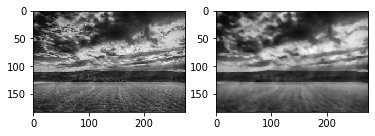

In [32]:
# 中值濾波

img = cv2.imread('view.jpg',0) #直接讀為灰度影象
# for i in range(2000): #新增點噪聲
temp_x = np.random.randint(0,img.shape[0])
temp_y = np.random.randint(0,img.shape[1])
img[temp_x][temp_y] = 255
blur = cv2.medianBlur(img,5)
plt.subplot(1,2,1),plt.imshow(img,'gray')#預設彩色，另一種彩色bgr
plt.subplot(1,2,2),plt.imshow(blur,'gray')

In [ ]:
img = cv2.imread('view.jpg')
cv2.imshow('sample folder', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

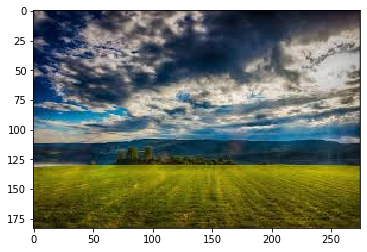

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('sample folder/view.jpg')


# print(img)
# plt.figure()
# plt.imshow(img)

img = img[...,::-1]
plt.figure()
plt.imshow(img)

# # cv2.imshow('sample folder', img)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [11]:
for i in range(6):
    print(images[i].shape)

(822, 1200, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


(822, 1200, 3)


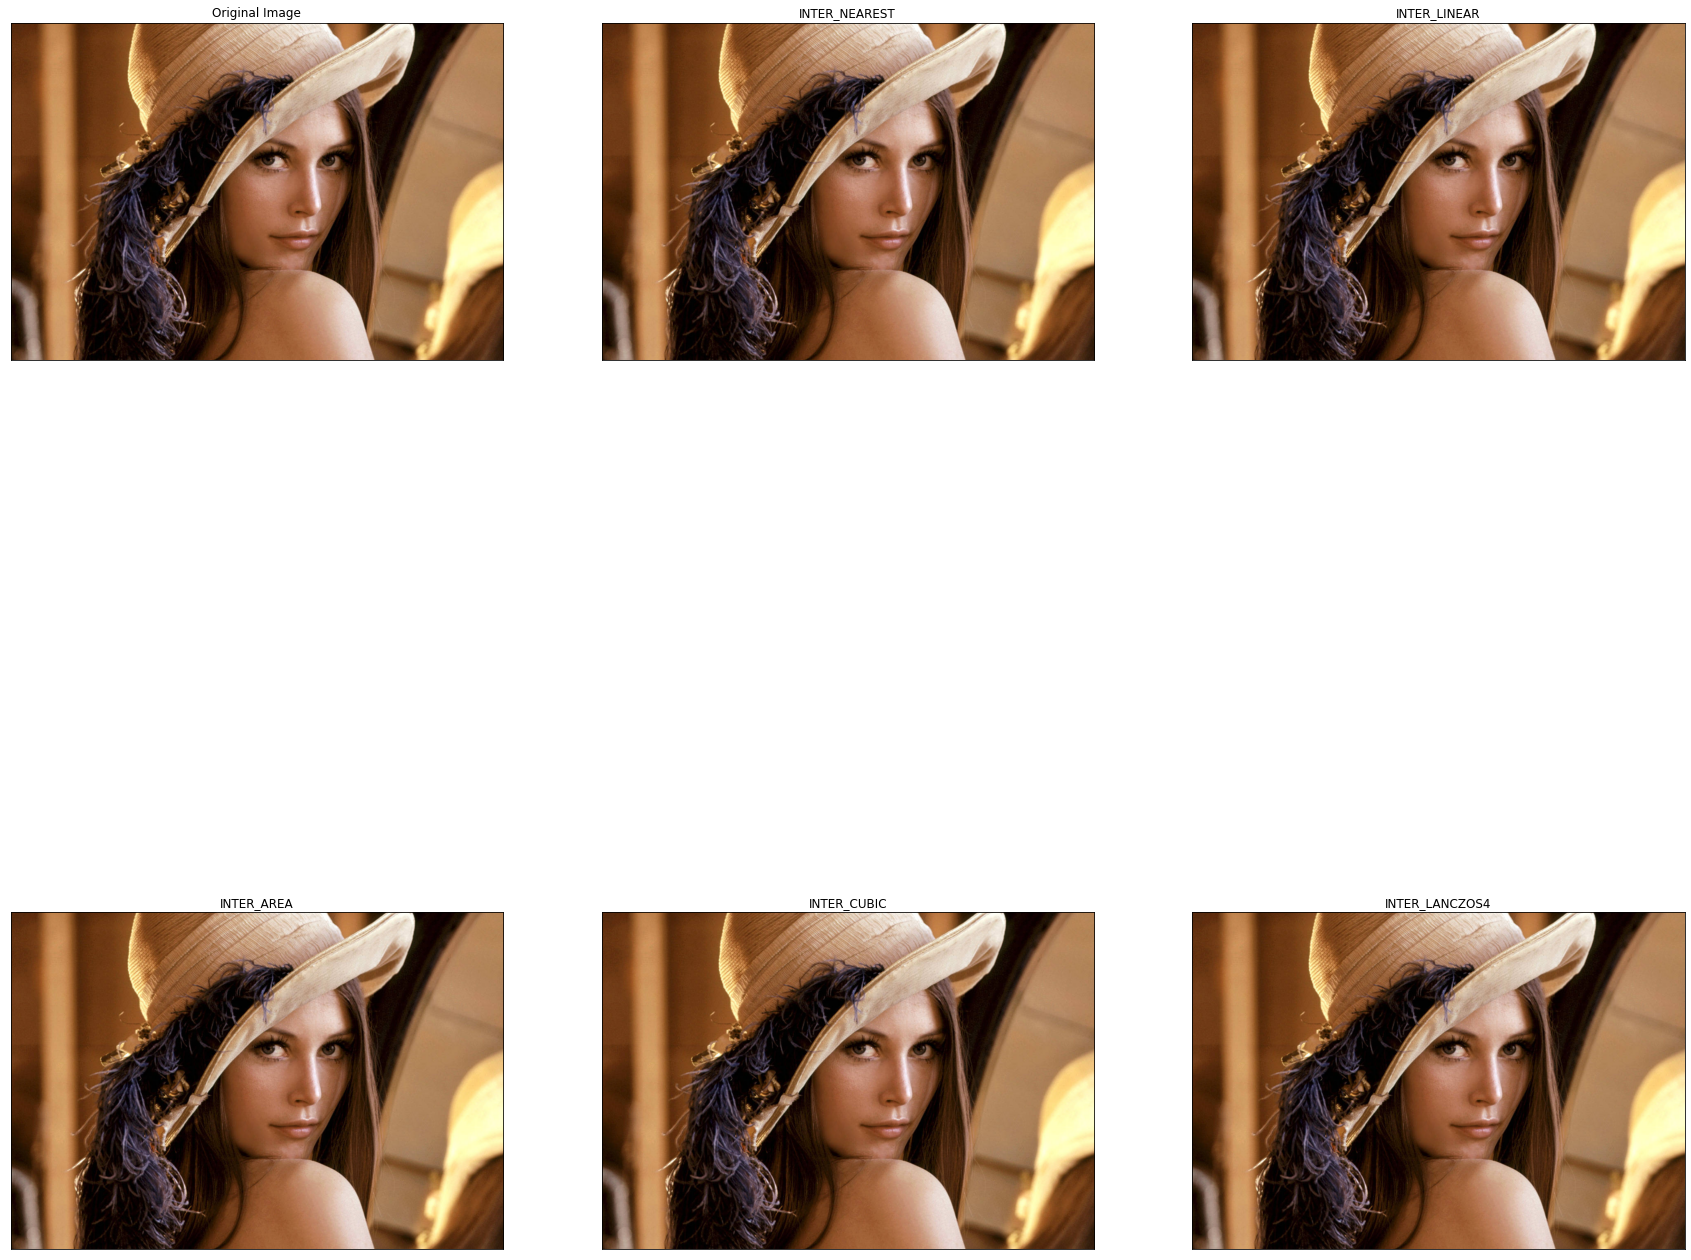

In [13]:
# 8/6 cv2 resize test

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Lena.jpg') # shape:(822, 1200, 3)
print(img.shape)
# plt.figure(figsize=(10,10))
# plt.imshow(img[:,:,::-1])
# plt.show()
img1 = cv2.resize(img, (1000,1000), interpolation=cv2.INTER_NEAREST) # 使用 INTER_NEAREST 會有些微地鋸齒狀，
img2 = cv2.resize(img, (1000,1000), interpolation=cv2.INTER_LINEAR)
img3 = cv2.resize(img, (1000,1000), interpolation=cv2.INTER_AREA)
img4 = cv2.resize(img, (1000,1000), interpolation=cv2.INTER_CUBIC)
img5 = cv2.resize(img, (1000,1000), interpolation=cv2.INTER_LANCZOS4)

img0_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

titles = ['Original Image', 'INTER_NEAREST', 'INTER_LINEAR', 'INTER_AREA', 'INTER_CUBIC', 'INTER_LANCZOS4']
images = [img0_rgb, img1_rgb, img2_rgb, img3_rgb, img4_rgb, img5_rgb]
plt.figure(figsize=(30,30))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()